Highest Accuracy: 0.99 with 1 neighbors
Lowest Accuracy: 0.55 with 207 neighbors


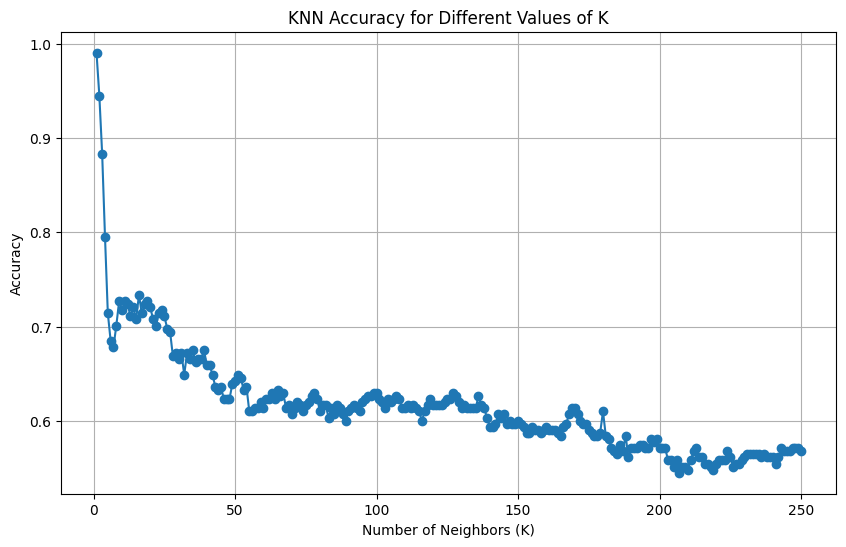

In [ ]:
#@title TASK 1
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

data = pd.read_csv('heart.csv')

X = data.drop(columns=['target'])
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

accuracies = []

for k in range(1, 251):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append((k, acc))

best_k = max(accuracies, key=lambda x: x[1])
worst_k = min(accuracies, key=lambda x: x[1])

print(f"Highest Accuracy: {best_k[1]:.2f} with {best_k[0]} neighbors")
print(f"Lowest Accuracy: {worst_k[1]:.2f} with {worst_k[0]} neighbors")

plt.figure(figsize=(10, 6))
plt.plot(range(1, 251), [acc[1] for acc in accuracies], marker='o')
plt.title('KNN Accuracy for Different Values of K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.grid()
plt.show()


In [ ]:
#@title TASK 2

seed_accuracies = []

for seed in range(1, 11):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
    knn = KNeighborsClassifier(n_neighbors=best_k[0])  #best K from Task 1
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    seed_accuracies.append((seed, acc))

for seed, acc in seed_accuracies:
    print(f"Random Seed {seed}: Accuracy = {acc:.2f}")

best_seed = max(seed_accuracies, key=lambda x: x[1])
worst_seed = min(seed_accuracies, key=lambda x: x[1])

print(f"\nHighest Accuracy: {best_seed[1]:.2f} with Seed {best_seed[0]}")
print(f"Lowest Accuracy: {worst_seed[1]:.2f} with Seed {worst_seed[0]}")



Random Seed 1: Accuracy = 0.98
Random Seed 2: Accuracy = 0.96
Random Seed 3: Accuracy = 0.98
Random Seed 4: Accuracy = 0.98
Random Seed 5: Accuracy = 0.98
Random Seed 6: Accuracy = 0.96
Random Seed 7: Accuracy = 0.99
Random Seed 8: Accuracy = 0.99
Random Seed 9: Accuracy = 0.97
Random Seed 10: Accuracy = 0.97

Highest Accuracy: 0.99 with Seed 8
Lowest Accuracy: 0.96 with Seed 2


Confusion Matrix:
 [[37  1  0  0  0  2]
 [ 0 10  0  6  0  0]
 [ 0  0 19  0  0  0]
 [ 0  4  0 10  1  0]
 [ 0  2  0  4 10  0]
 [ 0  0  0  1  0  3]]


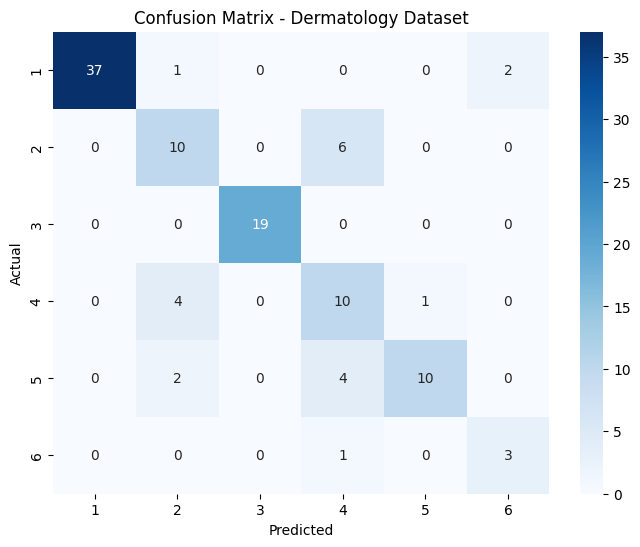


Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.93      0.96        40
           2       0.59      0.62      0.61        16
           3       1.00      1.00      1.00        19
           4       0.48      0.67      0.56        15
           5       0.91      0.62      0.74        16
           6       0.60      0.75      0.67         4

    accuracy                           0.81       110
   macro avg       0.76      0.77      0.76       110
weighted avg       0.84      0.81      0.82       110


10-Fold Cross Validation Accuracy: 0.87 ± 0.07


In [ ]:
#@title TASK 3
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

derma_data = pd.read_csv('dermatology.data', header=None, na_values='?')

derma_data.fillna(derma_data.mean(), inplace=True)

X_derma = derma_data.iloc[:, :-1]
y_derma = derma_data.iloc[:, -1]

X_train_derma, X_test_derma, y_train_derma, y_test_derma = train_test_split(
    X_derma, y_derma, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_derma, y_train_derma)
y_pred_derma = knn.predict(X_test_derma)

conf_matrix = confusion_matrix(y_test_derma, y_pred_derma)
print("Confusion Matrix:\n", conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_derma),
            yticklabels=np.unique(y_derma))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Dermatology Dataset')
plt.show()

print("\nClassification Report:\n", classification_report(y_test_derma, y_pred_derma))

kfold = KFold(n_splits=10, random_state=42, shuffle=True)
cross_val_scores = cross_val_score(knn, X_derma, y_derma, cv=kfold)

print(f"\n10-Fold Cross Validation Accuracy: {cross_val_scores.mean():.2f} ± {cross_val_scores.std():.2f}")
